<a href="https://colab.research.google.com/github/AgustinCocciardi/IA_Tps/blob/main/Con_Normalizacion_Trabajo_Pr%C3%A1ctico_ML_Regresi%C3%B3n_Predicci%C3%B3n_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico ML - Regresión Lineal - Predicción - Eficiencia Energética

---



Este dataset lo obtuvimos del repositorio de aprendizaje automático de UCI.
https://archive.ics.uci.edu/ml/datasets/energy+efficiency

Este estudio analizó la evaluación de los requisitos de carga de calefacción y carga de refrigeración de los edificios (es decir, la eficiencia energética) en función de los parámetros del edificio.

Realizamos análisis energéticos utilizando 12 formas de edificios diferentes. Los edificios se diferencian en cuanto a la superficie acristalada, la distribución de la superficie acristalada y la orientación, entre otros parámetros.

Features:
- Relative_Compactness
- Surface_Area
- Wall_Area
- Roof_Area
- Overall_Height
- Orientation
- Glazing_Area
- Glazing_Area_Distribution

Predict:
Heating_Load
Cooling_Load

# Contenido Teórico y Práctico para Desarrollo del Trabajo Práctico

**Importación Librerías**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# LINK SKLEARN LINEAR REGRESSION: https://scikit-learn.org/stable/search.html?q=linear+regression

**Carga Dataset**

In [3]:
dataset = pd.read_csv('/content/03_Energy-Efficiency_Dataset.csv')

**Análisis Dataset**

In [4]:
print('ENERGY EFFICIENCY DATASET - HEAD: \n', dataset.head(5))

ENERGY EFFICIENCY DATASET - HEAD: 
    Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.3

In [5]:
print('ENERGY EFFICIENCY DATASET - SHAPE: ', dataset.shape)

ENERGY EFFICIENCY DATASET - SHAPE:  (768, 10)


In [6]:
print('ENERGY EFFICIENCY DATASET - INFO: \n', dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
ENERGY EFFICIENCY DATASET - INFO: 
 None


In [7]:
print('ENERGY EFFICIENCY DATASET - STATISTICS: \n', dataset.describe())

ENERGY EFFICIENCY DATASET - STATISTICS: 
        Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.5000

**Análisis Datos**

Coeficientes Correlación (Ver referencia: [correlation matrix](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/))
Un coeficiente de correlación (normalmente denominado r) es un número único que describe el alcance de la relación lineal entre dos variables. Un valor de +1 indica una linealidad perfecta (las dos variables se mueven juntas, como "altura en pulgadas" y "altura en centímetros"). Un valor de r = 0 indica que no hay correlación (las variables son independientes) y r = -1 indica que las variables están inversamente correlacionadas (un aumento en una variable se asocia con una disminución en la otra).

ENERGY EFFICIENCY DATASET - CORRELATION MATRIX: 
                            Relative_Compactness  Surface_Area  Wall_Area  \
Relative_Compactness                       1.00         -0.99      -0.20   
Surface_Area                              -0.99          1.00       0.20   
Wall_Area                                 -0.20          0.20       1.00   
Roof_Area                                 -0.87          0.88      -0.29   
Overall_Height                             0.83         -0.86       0.28   
Orientation                                0.00         -0.00      -0.00   
Glazing_Area                              -0.00          0.00      -0.00   
Glazing_Area_Distribution                 -0.00          0.00       0.00   
Heating_Load                               0.62         -0.66       0.46   
Cooling_Load                               0.63         -0.67       0.43   

                           Roof_Area  Overall_Height  Orientation  \
Relative_Compactness           -0.87        

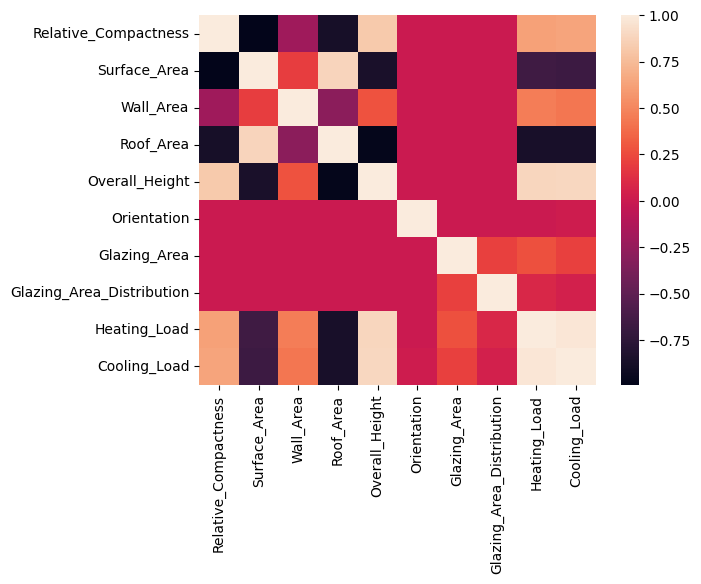

In [8]:
cormat = dataset.corr()
print('ENERGY EFFICIENCY DATASET - CORRELATION MATRIX: \n', round(cormat,2))
sns.heatmap(cormat);

Visualización de Relación Lineal entre Pares de Features

In [ ]:
sns.pairplot(dataset[[
'Relative_Compactness',
'Surface_Area',
'Wall_Area',
'Roof_Area',
'Overall_Height',
'Orientation',
'Glazing_Area',
'Glazing_Area_Distribution',
'Heating_Load',
'Cooling_Load',
 ]]);

Otra técnica utilizada para identificar relación entre features para seleccionar las más relevantes podemos investigar [mutual_info de scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) y [ejemplo](https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a)

In [9]:
x = dataset.drop(labels=['Heating_Load','Cooling_Load'], axis=1)
x

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [10]:
y = dataset['Heating_Load']
y

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64

In [11]:
x_train_features, x_test_features, y_train_features, y_test_features = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [12]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train_features, y_train_features)
print('ENERGY EFFICIENCY DATASET - FEATURE COLS - MUTUAL INFO: \n', mutual_info)

ENERGY EFFICIENCY DATASET - FEATURE COLS - MUTUAL INFO: 
 [1.63405195 1.63256722 1.03934521 0.84808436 0.65233021 0.
 0.6666937  0.16462108]


In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train_features.columns
mutual_info.sort_values(ascending=False)

Relative_Compactness         1.634052
Surface_Area                 1.632567
Wall_Area                    1.039345
Roof_Area                    0.848084
Glazing_Area                 0.666694
Overall_Height               0.652330
Glazing_Area_Distribution    0.164621
Orientation                  0.000000
dtype: float64

<Axes: >

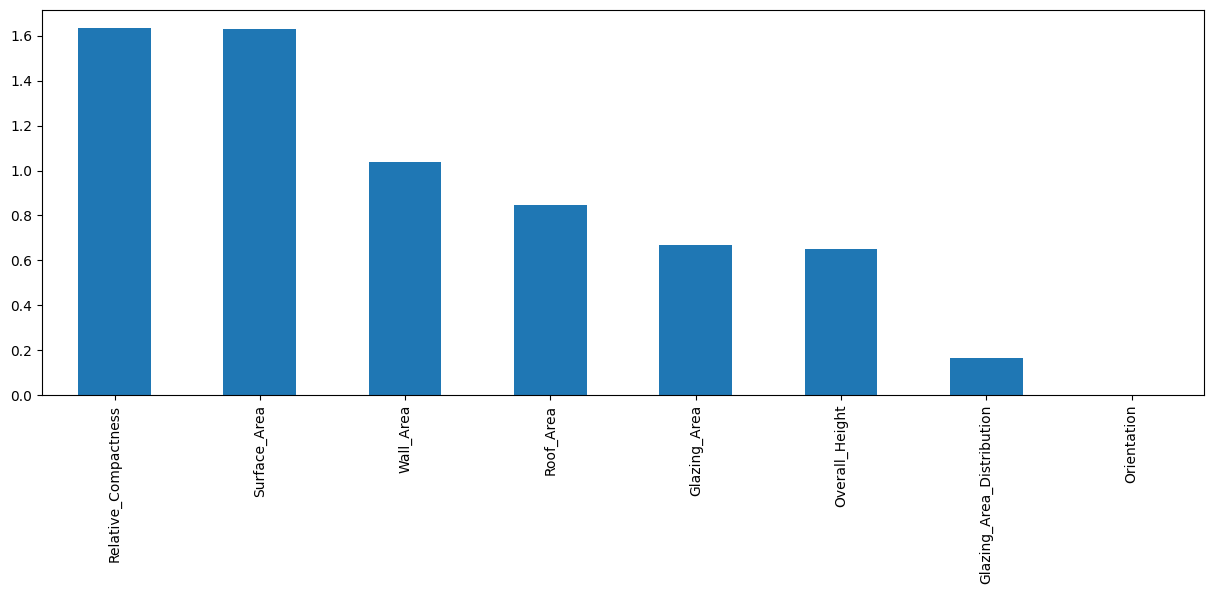

In [14]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

**Determinación Features Cols**

In [15]:
feature_cols = [
'Cooling_Load',
'Roof_Area',
'Overall_Height']
x = dataset[feature_cols]
print('ENERGY EFFICIENCY DATASET - X (FEATURES COLS): \n', x)
y = dataset.Heating_Load
print('ENERGY EFFICIENCY DATASET - Y (PREDICTION LABEL): \n', y)

ENERGY EFFICIENCY DATASET - X (FEATURES COLS): 
      Cooling_Load  Roof_Area  Overall_Height
0           21.33     110.25             7.0
1           21.33     110.25             7.0
2           21.33     110.25             7.0
3           21.33     110.25             7.0
4           28.28     122.50             7.0
..            ...        ...             ...
763         21.40     220.50             3.5
764         16.88     220.50             3.5
765         17.11     220.50             3.5
766         16.61     220.50             3.5
767         16.03     220.50             3.5

[768 rows x 3 columns]
ENERGY EFFICIENCY DATASET - Y (PREDICTION LABEL): 
 0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64


**Separación Set de Datos**

In [16]:
set_test_size = 0.2

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=set_test_size, random_state=0, shuffle=True)

In [18]:
x_train = x_train.values

In [19]:
x_train

array([[ 17.03, 220.5 ,   3.5 ],
       [ 34.17, 122.5 ,   7.  ],
       [ 33.01, 122.5 ,   7.  ],
       ...,
       [ 35.04, 122.5 ,   7.  ],
       [ 17.47, 220.5 ,   3.5 ],
       [ 28.2 , 147.  ,   7.  ]])

In [20]:
y_train = y_train.values

In [21]:
x_test = x_test.values

In [22]:
x_test

array([[ 17.63, 220.5 ,   3.5 ],
       [ 13.57, 220.5 ,   3.5 ],
       [ 34.62, 147.  ,   7.  ],
       [ 21.16, 147.  ,   7.  ],
       [ 33.34, 110.25,   7.  ],
       [ 34.2 , 122.5 ,   7.  ],
       [ 30.18, 110.25,   7.  ],
       [ 30.34, 147.  ,   7.  ],
       [ 29.82, 147.  ,   7.  ],
       [ 24.61, 147.  ,   7.  ],
       [ 11.67, 220.5 ,   3.5 ],
       [ 38.35, 147.  ,   7.  ],
       [ 14.65, 220.5 ,   3.5 ],
       [ 39.41, 147.  ,   7.  ],
       [ 37.7 , 147.  ,   7.  ],
       [ 31.06, 147.  ,   7.  ],
       [ 13.87, 220.5 ,   3.5 ],
       [ 34.33, 122.5 ,   7.  ],
       [ 15.38, 220.5 ,   3.5 ],
       [ 15.4 , 220.5 ,   3.5 ],
       [ 14.38, 220.5 ,   3.5 ],
       [ 33.13, 110.25,   7.  ],
       [ 14.14, 220.5 ,   3.5 ],
       [ 43.86, 147.  ,   7.  ],
       [ 11.17, 220.5 ,   3.5 ],
       [ 17.37, 220.5 ,   3.5 ],
       [ 14.47, 220.5 ,   3.5 ],
       [ 16.69, 220.5 ,   3.5 ],
       [ 14.27, 220.5 ,   3.5 ],
       [ 37.54, 147.  ,   7.  ],
       [ 1

In [23]:
y_test = y_test.values

**Normalizacion**

Normalización por Escalado de Características.

Referencia: https://www.youtube.com/watch?v=YWSCQxenjo0&list=PLcNHLC-YNYt8GThRSgF31IVSNe7zmsQr7&index=8

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
ss.fit(x_train)

StandardScaler()

In [27]:
x_train_norm = ss.transform(x_train)
x_test_norm = ss.transform(x_test)

**Definición Modelo**

In [28]:
regressor = LinearRegression()

**Entrenamiento Modelo**

In [29]:
regressor.fit(x_train_norm, y_train)

LinearRegression()

**Predicción Resultados**

In [30]:
y_pred = regressor.predict(x_test_norm)

In [31]:
print('ENERGY EFFICIENCY DATASET - Y PREDICTIONS: \n', y_pred)

ENERGY EFFICIENCY DATASET - Y PREDICTIONS: 
 [14.79808809 10.9494214  32.26726391 19.50789112 32.0127629  32.5083738
 29.01724894 28.21004879 27.71711611 22.77830985  9.14832123 35.80310793
 11.97320466 36.80793223 35.18694208 28.89257096 11.23380564 32.63160697
 12.6652063  12.68416525 11.71725885 31.81369394 11.48975146 41.02629842
  8.6743475  14.55162175 11.80257412 13.90701747 11.61298463 35.03527049
 11.32860039 13.38564637 43.47200287 13.46148217 28.63806995 34.28103555
 13.32876953 35.09627037 14.39047068 13.99233275 11.07265457 34.30535094
 14.39047068 24.48461528 25.32828851 25.07378751 11.25276459 12.46613734
 31.20968579 28.83569411 32.58153138 11.61298463 32.36618169 14.80756756
 35.35221618 11.07265457 20.62791393 29.20539362 34.7698452  14.10608644
 15.24362339 12.219671   32.50569558 11.09161352 13.11074161 11.82153307
 43.02646756 11.87840991 29.82155947 34.40014569 31.48191233 11.15796985
 22.92998144 14.06816854 16.55179088 27.77399296 31.6430634  40.90306526
 31.576

**Evaluación Modelo**

In [32]:
from sklearn.metrics import mean_squared_error

Mean Squared Error (Ver referencia: [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html))

In [33]:
print('ENERGY EFFICIENCY DATASET - MEAN SQUARED ERROR: ', mean_squared_error(y_test, y_pred))

ENERGY EFFICIENCY DATASET - MEAN SQUARED ERROR:  5.760291465213852


Coeficientes Regressor (Ver referencia: [regressor.coef_ property](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-regression))

In [34]:
regressor.coef_

array([ 8.96501581, -1.1739696 , -0.27706074])

Score de Evaluación

In [36]:
regressor.score(x_test_norm, y_test)

0.9478358601264631

Ver ejemplo para balancear dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
x_res_over_sampler, y_res_over_sampler = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res_over_sampler)}")
print(f"Testing target statistics: {Counter(y_test)}")
classes = y_res_over_sampler
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
x_res_under_sampler, y_res_under_sampler = under_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")
classes = y_res_under_sampler
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()